In [1]:
import itertools
import numpy as np
import os
import seaborn as sns
from tqdm import tqdm
from dataclasses import asdict, dataclass, field
import vsketch
import shapely.geometry as sg
from shapely.geometry import box, MultiLineString, Point, MultiPoint, Polygon, MultiPolygon, LineString
import shapely.affinity as sa
import shapely.ops as so
import matplotlib.pyplot as plt
import pandas as pd

import vpype_cli
from typing import List, Generic
from genpen import genpen as gp, utils as utils
from scipy import stats as ss
import geopandas
from shapely.errors import TopologicalError
import functools
from genpen.flow.field import PerlinGrid
from genpen.flow.particle import VectorParticle
%load_ext autoreload
%autoreload 2

In [4]:
paper_size = '11x14 inches'
border:float=30
paper = utils.Paper(paper_size)

drawbox = paper.get_drawbox(border)
buffer_style = 2

In [6]:
db = gp.Shape(drawbox)

In [7]:
db.height

295.59999999999997

In [9]:
rad = 60
center = db.p.centroid

In [11]:
circle = center.buffer(rad)

In [28]:
y_spacing = 2
y_spacing_delta = 0.2
y_start = db.bottom
y_end = db.top
y = y_start
ys = []
while y < y_end:
    y += y_spacing
    y_spacing += y_spacing_delta
    ys.append(y)

In [29]:
ys

[32.0,
 34.2,
 36.6,
 39.2,
 42.0,
 45.0,
 48.2,
 51.6,
 55.2,
 59.00000000000001,
 63.00000000000001,
 67.2,
 71.60000000000001,
 76.20000000000002,
 81.00000000000001,
 86.00000000000001,
 91.20000000000002,
 96.60000000000002,
 102.20000000000003,
 108.00000000000003,
 114.00000000000003,
 120.20000000000003,
 126.60000000000004,
 133.20000000000005,
 140.00000000000006,
 147.00000000000006,
 154.20000000000007,
 161.60000000000008,
 169.20000000000007,
 177.00000000000009,
 185.00000000000009,
 193.2000000000001,
 201.6000000000001,
 210.2000000000001,
 219.0000000000001,
 228.0000000000001,
 237.2000000000001,
 246.6000000000001,
 256.2000000000001,
 266.0000000000001,
 276.0000000000001,
 286.2000000000001,
 296.6000000000001,
 307.2000000000001,
 318.0000000000001,
 329.0000000000001]

In [30]:
x_start = db.left
x_end = db.right
lss = [LineString(((x_start, y), (x_end, y))) for y in ys]
    

In [32]:
mls = MultiLineString(lss)

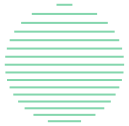

In [33]:
mls.intersection(circle)